Дана матрица $A$, вычислите SVD разложение с помощью функции `numpy.linalg.svd`. Найдите [определитель](https://ru.wikipedia.org/wiki/Определитель ) матрицы $U$ с помощью функции `numpy.linalg.det`. Чему равен определитель?

In [8]:
from numpy.linalg import svd, det
import numpy as np

A = np.array([[3,2,2],[2,3,-2]])

u, s, vh = svd(A, full_matrices=True)
print(u)
print('Определитель матрицы U = {}'.format(det(u)))


[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Определитель матрицы U = 0.9999999999999997


### 6.2 

Поработайте с изображениями.

<pre>
pip install Pillow
</pre>

Загрузим картинку в трёхмерный *numpy array* и отобразим её прямо в jupyter notebook.

In [9]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


<class 'numpy.ndarray'> (380, 509, 3)


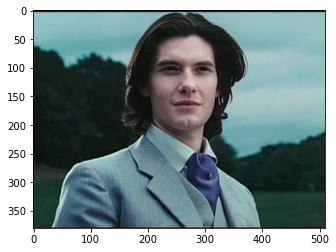

[[0.6039216  0.78039217 0.78039217]
 [0.6039216  0.78039217 0.78039217]
 [0.6039216  0.78039217 0.78039217]
 ...
 [0.5921569  0.7647059  0.7647059 ]
 [0.59607846 0.76862746 0.76862746]
 [0.59607846 0.76862746 0.76862746]]


In [14]:
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('C:\\Users\\Tarar\\dorian_grey.png')
print(type(img),img.shape)
imshow(img)
plt.show()
print(img[10])

У нас трёхмерный массив, где третье измерение соответствует цветовой компоненте rgb. Цветную картинку можно преобразовать в двумерную серую (grayscale) с помощью формулы, которую я нашёл [тут](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python) 

<class 'numpy.ndarray'> (380, 509)


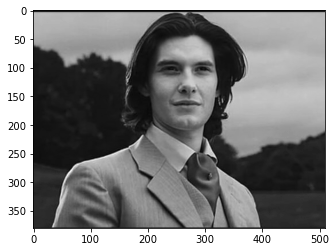

In [21]:
def rgb2gray(rgb):
    ''' Берётся среднее трёх цветов RGB'''
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))
    return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap = "gray")
plt.show()

Далее 

* обучите на массиве *img_gray* размерности $894 \times 588$ класс TruncatedSVD c параметром n_components=5
* получите матрицу *img_gray_svd* с помощью функции `transform`
* получите массив *img_gray_svd_restored* с помощью функции `inverse_transform`
* визуализируйте массив *img_gray_svd_restored* с помощью функции *imshow*

(380, 5)


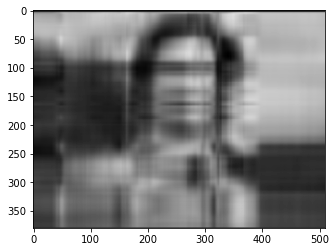

In [31]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=5).fit(img_gray)
img_gray_svd= svd_model.transform(img_gray)
print(img_gray_svd.shape)
img_gray_svd_restored = svd_model.inverse_transform(img_gray_svd)

imshow(img_gray_svd_restored, cmap = "gray")
plt.show()